# Shallow water Riemann solvers in Clawpack
A wide range of shallow water (SW) solvers are available in `clawpack.riemann`.  Here's a brief description of each.  For each one, we have indicated (after "Fortran:") the files you should compile to use it in the Fortran codes, and after "PyClaw" where you should import it from to use it in Python.  If a pure-Python implementation is available, we also indicate that.  Finally, we include links to examples that use each solver.

## One dimension
For most 1D solvers, the vector `q` of conserved quantities is

$$
q = \begin{bmatrix} h \\ hu \end{bmatrix},
$$

where $h$ is depth and $hu$ is momentum.  Solvers with a tracer include that as a 3rd component.  For solvers with bathymetry, the bathymetry is the first (and only) component of `aux`.  All solvers require setting a constant parameter `grav`, which controls the force of gravity.

- **Basic Roe solver**: The most basic solver.  Uses Roe's linearization, with an entropy fix.  
  - Fortran code: [rp1_shallow_roe_with_efix.f90](https://github.com/clawpack/riemann/blob/master/src/rp1_shallow_roe_with_efix.f90)
  - PyClaw import: `riemann.shallow_roe_with_efix_1D`
  - Pure Python code: `riemann.shallow_1D_py.shallow_roe_1D`
  - Examples: 
    - https://github.com/clawpack/pyclaw/blob/master/examples/shallow_1d/dam_break.py
- **HLL solver**: Also basic; uses HLL instead of Roe.
  - Pure Python `riemann.shallow_1D_py.shallow_hll_1D`
- **Roe solver with a tracer**: Uses Roe's linearization and add a 3rd equation to advect a passive tracer.  Useful if you want to track which bit of water went where.  
  - Fortran code: [rp1_shallow_roe_tracer.f90](https://github.com/clawpack/riemann/blob/master/src/rp1_shallow_roe_tracer.f90)
  - PyClaw import: `riemann.shallow_roe_tracer_1D`
  - Examples:
    - https://github.com/clawpack/riemann_book/blob/master/Shallow_tracer.ipynb
- **F-wave solver with bathymetry**: Use this one if you have varying bathymetry.  Uses the $f$-wave approach to incorporate source terms from bathymetry.  Well-balanced.  
  - Fortran: `rp1_shallow_bathymetry_fwave.f90` 
  - PyClaw: `riemann.shallow_bathymetry_fwave_1D`
  - Pure Python: `riemann.shallow_1D_py.shallow_fwave_1D`
  - Examples: 
    - https://github.com/clawpack/pyclaw/blob/master/examples/shallow_1d/sill.py

## Two dimensions
For most 2D solvers, the vector `q` of conserved quantities is

$$
q = \begin{bmatrix} h \\ hu \\ hv \end{bmatrix},
$$

where $h$ is depth and $hu, hv$ are the $x$- and $y$-components of momentum.  For solvers with bathymetry, the bathymetry is the first (and only) component of `aux`.  For the mapped solver, see the implementation for a description of `aux`.  As in 1D, all solvers require setting a constant parameter `grav`, which controls the force of gravity.

- **Basic Roe solver**: The most basic solver.  Uses Roe's linearization, with an entropy fix.  Normal and transverse solvers available.  
  - Fortran code: [rpn2_shallow_roe_with_efix.f90](https://github.com/clawpack/riemann/blob/master/src/rpn2_shallow_roe_with_efix.f90), [rpt2_shallow_roe_with_efix.f90](https://github.com/clawpack/riemann/blob/master/src/rpt2_shallow_roe_with_efix.f90) 
  - PyClaw import: `riemann.shallow_roe_with_efix_2D`.
  - Examples:  
    - https://github.com/clawpack/pyclaw/blob/master/examples/shallow_2d/radial_dam_break.py
- **F-wave solver with bathymetry**: Use this one if you have varying bathymetry but no dry states.  Uses the $f$-wave approach to incorporate source terms from bathymetry.  Well-balanced.  Normal solver only.  
  - Fortran: `rpn2_shallow_bathymetry_fwave.f90`.  
  - PyClaw: `riemann.shallow_bathymetry_fwave_2D`.
- **Mapped solver for the sphere**: Uses grid mapping to solve the shallow water equations on the sphere.  Does not include bathymetry.  Both normal and transverse solvers available.  
  - Fortran: [rpn2_shallow_sphere.f90](https://github.com/clawpack/riemann/blob/master/src/rpn2_shallow_sphere.f90), [rpt2_shallow_sphere.f90](https://github.com/clawpack/riemann/blob/master/src/rpt2_shallow_sphere.f90)
  - PyClaw: `riemann.shallow_sphere_2D`
  - Examples:
    - https://github.com/clawpack/pyclaw/blob/master/examples/shallow_sphere/Rossby_wave.py
- **GeoClaw "augmented" solver**: This is the most robust (but also the most costly) solver.  Used in GeoClaw.  Augmented solver (with extra waves) to handle bathymetry, and dry states.  Both normal and transverse solvers available.  
  - Fortran: [rpn2_geoclaw.f](https://github.com/clawpack/riemann/blob/master/src/rpn2_geoclaw.f), [rpt2_geoclaw.f](https://github.com/clawpack/riemann/blob/master/src/rpn2_geoclaw.f)
  - PyClaw import: (normal solver only) `riemann.sw_aug_2d`
  - Examples: 
      - https://github.com/clawpack/apps/blob/master/notebooks/pyclaw/beach.ipynb

## Layered shallow water equations
1D and 2D solvers for the layered shallow water equations are also included.

## Potentially useful contributions (what's missing)
- 2D mapped grid solvers (for a planar grid)
- Transverse versions of `rpn2_shallow_bathymetry_fwave.f90`, `rpn2_sw_aug.f90`.

## Demonstrations

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from clawpack import riemann
from clawpack.riemann import riemann_tools
import numpy as np

In [2]:
h_l = 1.; h_r = 0.5;
u_l = 0.; u_r = 0.;
q_l = np.array([h_l,u_l]); q_r = np.array([h_r,u_r])
problem_data={'grav':1.0,'efix':False}

### Roe

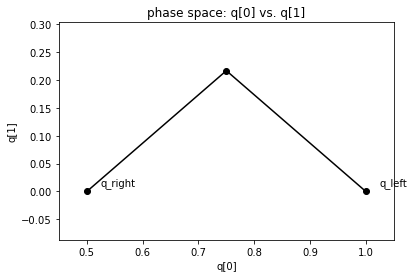

In [3]:
states, speeds, reval = riemann_tools.riemann_solution(riemann.shallow_1D_py.shallow_roe_1D,q_l,q_r,
                                                       problem_data=problem_data)
riemann_tools.plot_phase(states)

### HLL

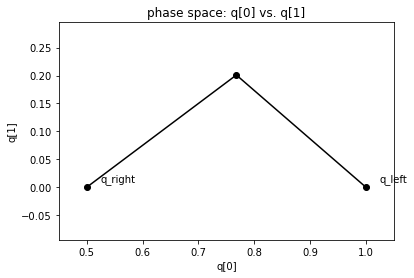

In [4]:
states, speeds, reval = riemann_tools.riemann_solution(riemann.shallow_1D_py.shallow_hll_1D,q_l,q_r,
                                                       problem_data=problem_data)
riemann_tools.plot_phase(states)